In [1]:
import numpy
import pandas
from matplotlib import pyplot
import seaborn

from scipy.io import loadmat
%matplotlib inline

In [2]:
data_raw = loadmat('data_svm1.mat')
data_raw

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

In [3]:
df = pandas.DataFrame(data_raw['X'], columns=['X1', 'X2'])
df['y'] = data_raw['y']
df.head(2)

X1      X2  y
0  1.9643  4.5957  1
1  2.2753  3.8589  1

In [4]:
df_pos = df[df['y'].isin([1])]

In [5]:
df_neg = df[df['y'].isin([0])]

/Users/phananh/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


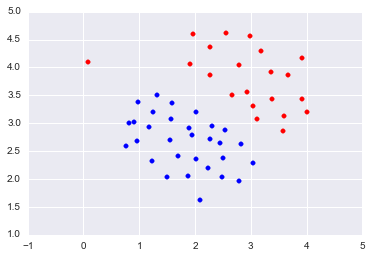

In [6]:
pyplot.scatter(df_pos['X1'].tolist(), df_pos['X2'].tolist(), color='red')
pyplot.scatter(df_neg['X1'].tolist(), df_neg['X2'].tolist(), color='blue')

In [7]:
#goal: compare linear regression with svm
#observation: outlier might ruin everything!!!
from sklearn.linear_model import LogisticRegression
clf_lg = LogisticRegression(C=1.0)
clf_lg.fit(df[['X1','X2']].as_matrix(), df['y'].tolist())
clf_lg.score(df[['X1','X2']].as_matrix(), df['y'].tolist())

0.98039215686274506

In [8]:
print clf_lg.coef_, clf_lg.intercept_, clf_lg.intercept_scaling

[[ 0.53468554  0.51684973]] [-2.95973398] 1


In [9]:
x1 = numpy.array([-0.0, 4.0])
x2 = (- clf_lg.intercept_[0] - x1 * clf_lg.coef_[0][0])/clf_lg.coef_[0][1]
print x1, x2

[-0.  4.] [ 5.72648834  1.58845359]


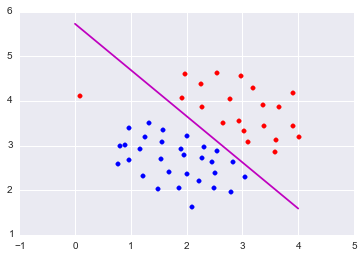

In [10]:
pyplot.plot(x1, x2, color='m')
pyplot.scatter(df_pos['X1'].tolist(), df_pos['X2'].tolist(), color='red')
pyplot.scatter(df_neg['X1'].tolist(), df_neg['X2'].tolist(), color='blue')

1.0


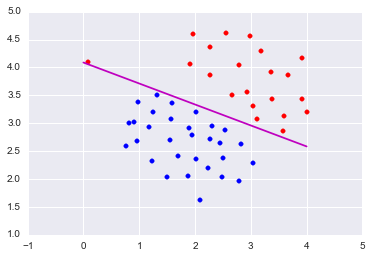

In [11]:
#ok, lets over fitting this model
clf_lg = LogisticRegression(C=1000.0)
clf_lg.fit(df[['X1','X2']].as_matrix(), df['y'].tolist())
print clf_lg.score(df[['X1','X2']].as_matrix(), df['y'].tolist())
x1 = numpy.array([-0.0, 4.0])
x2 = (- clf_lg.intercept_[0] - x1 * clf_lg.coef_[0][0])/clf_lg.coef_[0][1]
pyplot.plot(x1, x2, color='m')
pyplot.scatter(df_pos['X1'].tolist(), df_pos['X2'].tolist(), color='red')
pyplot.scatter(df_neg['X1'].tolist(), df_neg['X2'].tolist(), color='blue')


In [12]:
#lets try again with svm model
from sklearn import svm


In [13]:
clf_svc = svm.LinearSVC(C=1.0, loss='hinge', max_iter=1000)
print clf_svc

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)


In [14]:
clf_svc.fit(df[['X1','X2']].as_matrix(), df['y'].tolist())

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [15]:
clf_svc.score(df[['X1','X2']].as_matrix(), df['y'].tolist())

0.98039215686274506

In [16]:
print clf_svc.coef_, clf_svc.intercept_

[[ 0.59239541  0.81695475]] [-4.11449413]


In [17]:
x1 = numpy.array([-0.0, 4.0])
x2 = (- clf_svc.intercept_[0] - x1 * clf_svc.coef_[0][0])/clf_svc.coef_[0][1]
print x1, x2

[-0.  4.] [ 5.03637949  2.13587413]


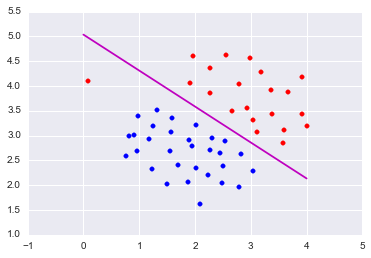

In [18]:
pyplot.plot(x1, x2, color='m')
pyplot.scatter(df_pos['X1'].tolist(), df_pos['X2'].tolist(), color='red')
pyplot.scatter(df_neg['X1'].tolist(), df_neg['X2'].tolist(), color='blue')

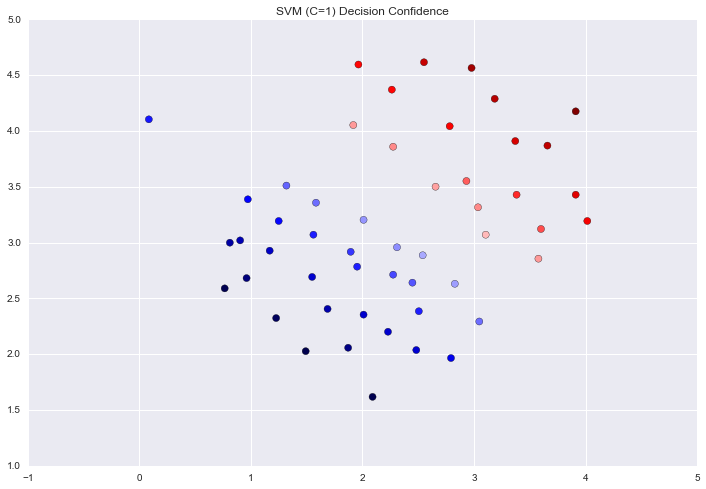

In [19]:
df['SVM 1 confidence'] = clf_svc.decision_function(df[['X1','X2']])

fig, ax = pyplot.subplots(figsize=(12,8))
ax.scatter(df['X1'], df['X2'], s=50, c=df['SVM 1 confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')

0.941176470588


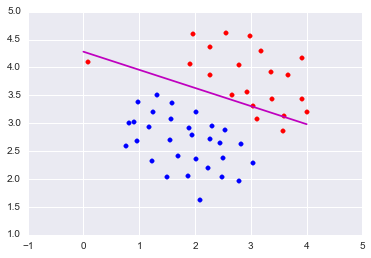

In [20]:
clf_svc2 = svm.LinearSVC(C=100.0, loss='hinge', max_iter=1000)
clf_svc2.fit(df[['X1','X2']].as_matrix(), df['y'].tolist())
print clf_svc2.score(df[['X1','X2']].as_matrix(), df['y'].tolist())
x1 = numpy.array([-0.0, 4.0])
x2 = (- clf_svc2.intercept_[0] - x1 * clf_svc2.coef_[0][0])/clf_svc2.coef_[0][1]
pyplot.plot(x1, x2, color='m')
pyplot.scatter(df_pos['X1'].tolist(), df_pos['X2'].tolist(), color='red')
pyplot.scatter(df_neg['X1'].tolist(), df_neg['X2'].tolist(), color='blue')

In [21]:
print clf_svc2.decision_function(df[['X1','X2']])



[ 2.78362314  0.92523734  3.65688609  0.65146209 -0.77001274  0.63284226
  0.71926207  3.40598523  1.94501985  3.40143836  2.11423988 -0.59043954
  1.15466942  2.41004814  0.23952803  3.04619173  2.26826757  1.2224573
  0.02965517  0.06184705 -1.19675274 -1.24101391 -2.52222827 -2.42517727
 -1.67412443 -2.13915272 -2.91860004 -4.202466   -3.16339925 -4.72266381
 -3.72357116 -4.55722907 -2.1878658  -2.0564384  -3.17403043 -3.88044999
 -5.17314902 -3.76203041 -2.84727325 -2.97708558 -1.6871353  -1.99281317
 -1.         -3.96468527 -2.47028201 -4.11662776 -5.80094311 -1.66491924
 -2.82931699 -4.21722447 -0.43544218]


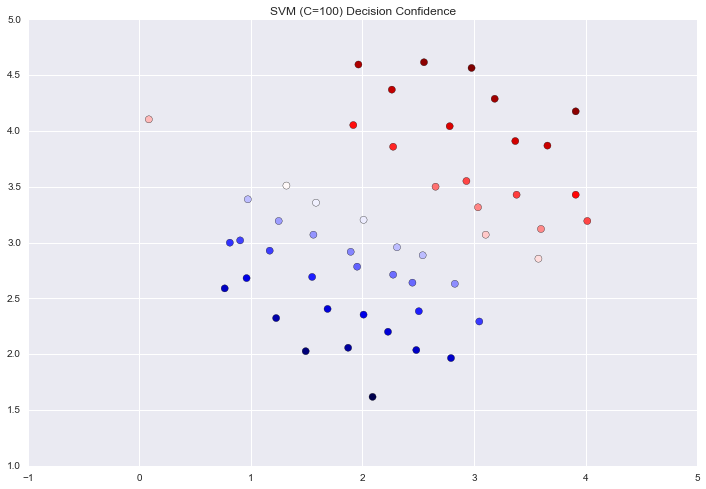

In [22]:
df['SVM 2 confidence'] = clf_svc2.decision_function(df[['X1','X2']])

fig, ax = pyplot.subplots(figsize=(12,8))
ax.scatter(df['X1'], df['X2'], s=50, c=df['SVM 2 confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')

In [23]:
#ok let's move to the part #2, using kernel to transform dataset before apply linear classifier
#a kernel transfrom input feature, output is? another dimension?
#xi = [xi_1, ..., xi_k]
def kernel_gaussian(x1, x2, sigma):
    return numpy.exp(-.5/(sigma**2) * numpy.sum((numpy.array(x1) - numpy.array(x2)) ** 2))#no need for normalization
def gaussian_kernel(x1, x2, sigma):  
    return numpy.exp(-(numpy.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

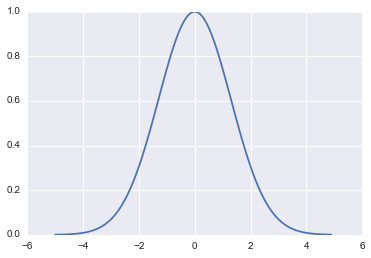

In [24]:
#test the gaussian kernel
kernel_gaussian(1, 2, 1.3)
x = numpy.array([i for i in range(-50, 50)])/10.0
x0 = 0
X = x - x0
y = [kernel_gaussian(x_i, x0, 1.3) for x_i in X]
pyplot.plot(X, y)

In [25]:
x1 = numpy.array([1.0, 2.0, 1.0])
x2 = numpy.array([0.0, 4.0, -1.0])
sigma = 2
kernel_gaussian(x1, x2, sigma)

0.32465246735834974

In [26]:
df_raw = loadmat('data_svm2.mat')
df = pandas.DataFrame(df_raw['X'], columns=['X1', 'X2'])
df['y'] = df_raw['y']

In [27]:
print len(df)
print df.info()
print df.head()
print df['y'].unique()
df_0 = df[df['y'] == 0]
df_1 = df[df['y'] == 1]
print len(df_0),len(df_1)

863
<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 3 columns):
X1    863 non-null float64
X2    863 non-null float64
y     863 non-null uint8
dtypes: float64(2), uint8(1)
memory usage: 21.1 KB
None
         X1        X2  y
0  0.107143  0.603070  1
1  0.093318  0.649854  1
2  0.097926  0.705409  1
3  0.155530  0.784357  1
4  0.210829  0.866228  1
[1 0]
383 480


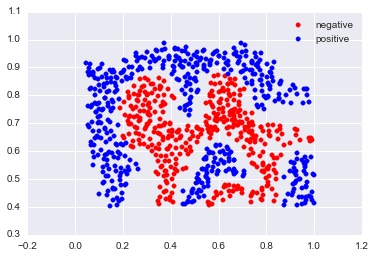

In [28]:
pyplot.scatter(df_0['X1'], df_0['X2'], color='red', label='negative')
pyplot.scatter(df_1['X1'], df_1['X2'], color='blue', label='positive')
pyplot.legend()

In [31]:
#first, let try a linear svm to see how good it will be
X = df[['X1', 'X2']].as_matrix()
y = df['y'].tolist()
clf_svc = svm.LinearSVC(C=1.0)
clf_svc.fit(X, y)
clf_svc.score(X, y)

0.53765932792584015

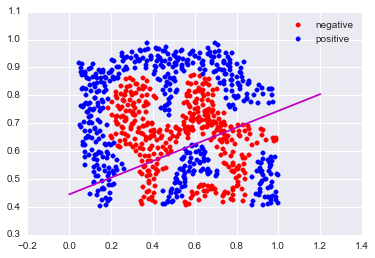

In [32]:
x1 = numpy.array([-0.0, 1.2])
x2 = (- clf_svc.intercept_[0] - x1 * clf_svc.coef_[0][0])/clf_svc.coef_[0][1]
pyplot.plot(x1, x2, color='m')
pyplot.scatter(df_0['X1'], df_0['X2'], color='red', label='negative')
pyplot.scatter(df_1['X1'], df_1['X2'], color='blue', label='positive')
pyplot.legend()

In [33]:
#result is quite bad, so let switch to non-linear svm right away!
clf_svc = svm.SVC(C=1.0, gamma=10, probability=True)
clf_svc.fit(X, y)
print 'score:', clf_svc.score(X, y)
df['Probability'] = clf_svc.predict_proba(data[['X1', 'X2']])[:, 0]
fig, ax = pyplot.subplots(figsize=(12, 8))
ax.scatter(X[:,0], X[:,1], c=df['Probability'], cmap='Reds')

score: 0.884125144844


NameError: name 'data' is not defined

In [ ]:
#result is quite bad, so let switch to non-linear svm right away!
clf_svc = svm.SVC(C=10.0, gamma=10, probability=True)
clf_svc.fit(X, y)
print 'score:', clf_svc.score(X, y)
df['Probability'] = clf_svc.predict_proba(data[['X1', 'X2']])[:, 0]
fig, ax = pyplot.subplots(figsize=(12, 8))
ax.scatter(X[:,0], X[:,1], c=df['Probability'], cmap='Reds')

In [34]:
#let try with third dataset
data_raw = loadmat('data_svm3.mat')
X = data_raw['X']
Xval = data_raw['Xval']
y = data_raw['y'].ravel()
yval = data_raw['yval'].ravel()

In [35]:
C_list = [.01, .03, .1, .3, 1.0, 3.0, 10.0, 30.0, 100.0]
gamma_list = [.01, .03, .1, .3, 1.0, 3.0, 10.0, 30.0, 100.0]

best_score = 0
best_param = {'C': None, 'gamma': None}

for C in C_list:
    for gamma in gamma_list:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        if score > best_score:
            print 'found better!: ', C, gamma, score
            best_score = score
            best_param['C'] = C
            best_param['gamma'] = gamma
print best_param
        

found better!:  0.01 0.01 0.435
found better!:  0.03 1.0 0.795
found better!:  0.03 3.0 0.83
found better!:  0.03 10.0 0.895
found better!:  0.1 10.0 0.925
found better!:  0.1 30.0 0.95
found better!:  0.3 10.0 0.955
found better!:  0.3 30.0 0.96
found better!:  0.3 100.0 0.965
{'C': 0.3, 'gamma': 100.0}


score train: 0.952606635071
score test: 0.965


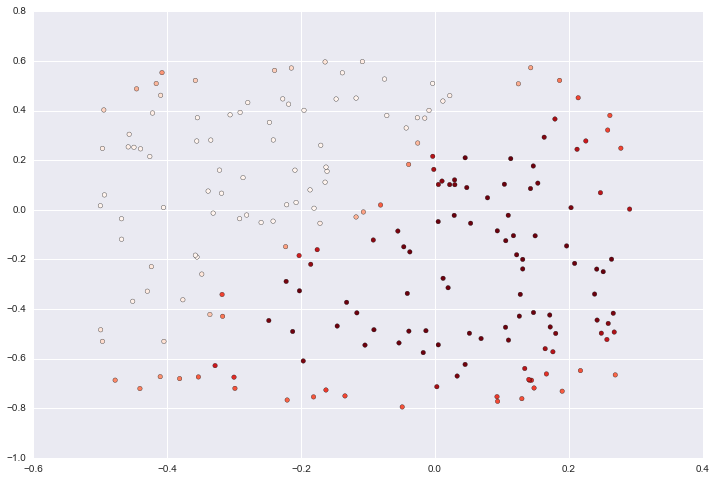

In [36]:
#ok, I think I found one
clf_svc = svm.SVC(C=.3, gamma=100, probability=True)
clf_svc.fit(X, y)
print 'score train:', clf_svc.score(X, y)
print 'score test:', clf_svc.score(Xval, yval)
prob_list = clf_svc.predict_proba(Xval)[:, 0]
fig, ax = pyplot.subplots(figsize=(12, 8))
ax.scatter(Xval[:,0], Xval[:,1], c=prob_list, cmap='Reds')

In [37]:
df = pandas.DataFrame(data=Xval, columns=['X1', 'X2'])
df['y'] = yval
print df['y'].unique()

[0 1]


In [38]:
df_0 = df[df['y'] == 0]
df_1 = df[df['y'] == 1]

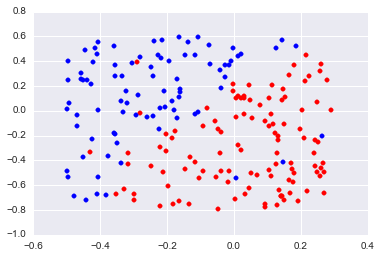

In [39]:
pyplot.scatter(df_0['X1'], df_0['X2'], label='negative', color='red')
pyplot.scatter(df_1['X1'], df_1['X2'], label='positive', color='blue')

score train: 0.919431279621
score test: 0.93


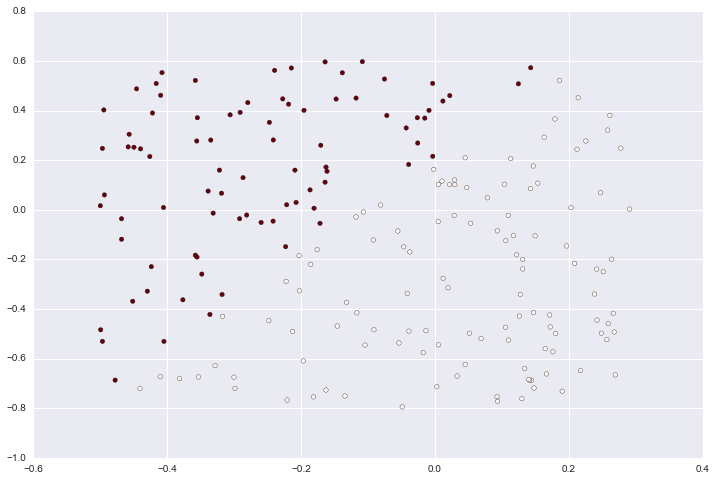

In [40]:
clf_svc = svm.LinearSVC(C=1)
clf_svc.fit(X, y)
print 'score train:', clf_svc.score(X, y)
print 'score test:', clf_svc.score(Xval, yval)
result = clf_svc.predict(Xval)
fig, ax = pyplot.subplots(figsize=(12, 8))
ax.scatter(Xval[:,0], Xval[:,1], c=result, cmap='Reds')

In [46]:
#last part, spam filter
spam_train = loadmat('data_spamtrain.mat')
spam_test = loadmat('data_spamtest.mat')

X = spam_train['X']
y = spam_train['y']
X_test = spam_test['Xtest']
y_test = spam_test['ytest']

In [42]:
print X_test.shape, X.shape


(1000, 1899) (4000, 1899)


In [47]:
svc = svm.SVC()
svc.fit(X, y)
print 'Test accuracy = {0}%'.format(numpy.round(svc.score(X_test, y_test) * 100, 2))

/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


Test accuracy = 95.3%


In [ ]:
C_list = [.01, .03, .1, .3, 1.0, 3.0, 10.0, 30.0, 100.0]
gamma_list = [.01, .03, .1, .3, 1.0, 3.0, 10.0, 30.0, 100.0]

best_score = 0
best_param = {'C': None, 'gamma': None}

for C in C_list:
    for gamma in gamma_list:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(X_test, y_test)
        if score > best_score:
            print 'found better!: ', C, gamma, score
            best_score = score
            best_param['C'] = C
            best_param['gamma'] = gamma
print best_param

/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


found better!:  0.01 0.01 0.692


/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

found better!:  0.03 0.01 0.769


/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl

found better!:  0.1 0.01 0.941


/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
/Users/phananh/anaconda/lib/python2.7/site-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sampl